In [254]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [255]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [256]:
warnings.filterwarnings('ignore')

In [257]:
%matplotlib inline 

In [258]:
sns.set_theme(context = 'paper' , style = 'ticks' , palette = 'Paired' , font_scale = 1.1 ,
             rc = {'figure.figsize' : (8 , 4)}) 

In [259]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [260]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [262]:
df.duplicated().sum()

0

In [263]:
df.isnull().mean()

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

In [264]:
df['Daily Time Spent on Site'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.0002,15.853615,32.6,51.36,68.215,78.5475,91.43


<AxesSubplot:xlabel='Daily Time Spent on Site'>

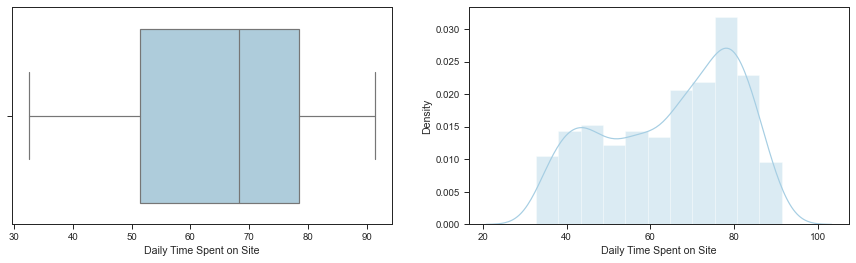

In [265]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
sns.distplot(df['Daily Time Spent on Site'] , ax = axis[1])
sns.boxplot(df['Daily Time Spent on Site'], ax = axis[0])

In [266]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,36.009,8.785562,19.0,29.0,35.0,42.0,61.0


<AxesSubplot:xlabel='Age'>

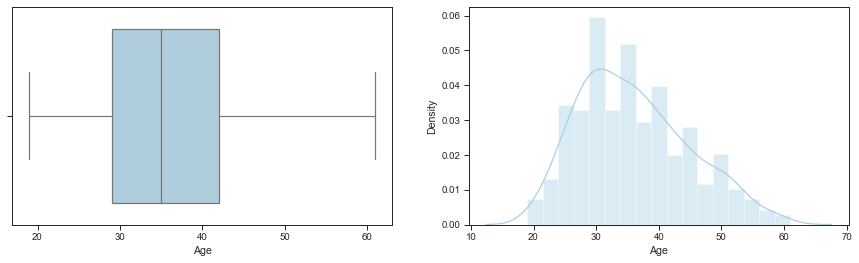

In [267]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
sns.distplot(df['Age'] , ax = axis[1])
sns.boxplot(df['Age'], ax = axis[0])

In [268]:
df['Area Income'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Area Income,1000.0,55000.00008,13414.634022,13996.5,47031.8025,57012.3,65470.635,79484.8


<AxesSubplot:xlabel='Age'>

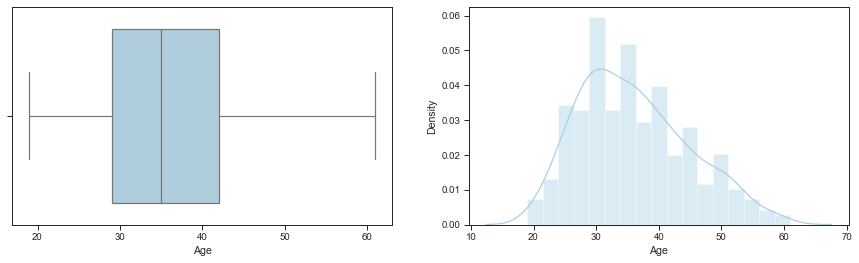

In [269]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
sns.distplot(df['Age'] , ax = axis[1])
sns.boxplot(df['Age'], ax = axis[0])

In [270]:
df['Daily Internet Usage'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Daily Internet Usage,1000.0,180.0001,43.902339,104.78,138.83,183.13,218.7925,269.96


<AxesSubplot:xlabel='Daily Internet Usage'>

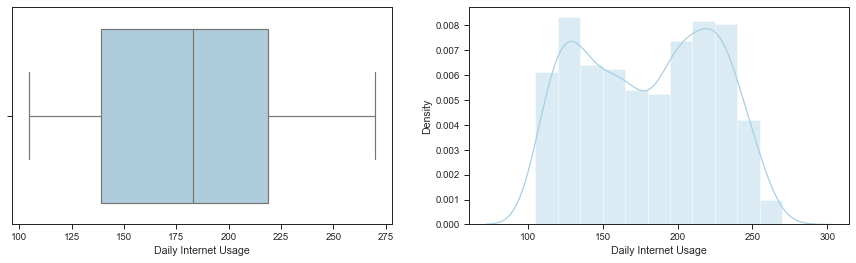

In [271]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
sns.distplot(df['Daily Internet Usage'] , ax = axis[1])
sns.boxplot(df['Daily Internet Usage'], ax = axis[0])

In [272]:
df['Ad Topic Line'].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [273]:
df.drop(['Ad Topic Line'] , axis = 1 , inplace = True)

In [274]:
df['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [275]:
df.drop(['City'] , axis = 1 , inplace = True)

In [276]:
df['Male'].value_counts(normalize = True)*100

0    51.9
1    48.1
Name: Male, dtype: float64

<AxesSubplot:xlabel='Male', ylabel='count'>

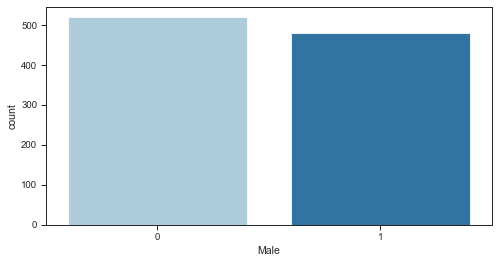

In [277]:
sns.countplot(df['Male'])

In [278]:
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [279]:
df.drop(['Country'] , axis =1 , inplace = True)

In [280]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'] , errors = 'coerce')

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 54.8 KB


In [282]:
df['Year'] = df['Timestamp'].dt.year

In [283]:
df['Month'] = df['Timestamp'].dt.month

In [284]:
df['Hour'] = df['Timestamp'].dt.hour

In [285]:
df['Year'].value_counts()

2016    1000
Name: Year, dtype: int64

In [286]:
df.drop(['Year'] , axis = 1 , inplace = True)

In [287]:
def get_season(r):
    if r in [12 , 1 , 2]:
        return "winter"
    elif r in [ 3 , 4 , 5]:
        return "spring"
    elif r in [6 , 7 , 8]:
        return "summer"
    elif r in [9 , 10 , 11]:
        return "autumn"
    else :
        return np.nan

In [288]:
df['Season'] = df['Month'].apply(get_season)

In [289]:
def get_day_period(r):
    if r in range(0 , 5):
        return "night"
    elif r in range(5 , 13):
        return "morning"
    elif r in range(13 , 19):
        return "afternoon"
    elif r in range(19,24):
        return "evening"
    else :
        return np.nan

In [290]:
df['Day_Period'] = df['Hour'].apply(get_day_period)

In [291]:
df.drop(['Month' , 'Hour'] , axis = 1 , inplace = True)

<AxesSubplot:xlabel='Season', ylabel='count'>

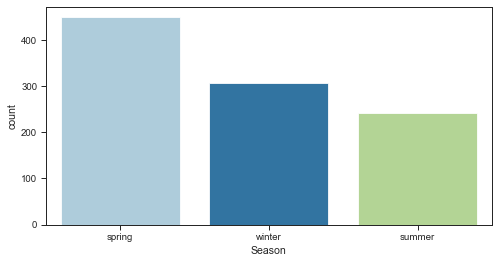

In [292]:
sns.countplot(df['Season'])

<AxesSubplot:xlabel='Day_Period', ylabel='count'>

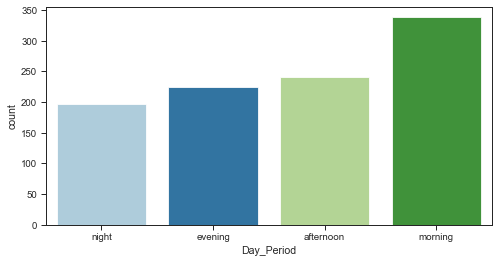

In [293]:
sns.countplot(df['Day_Period'])

<AxesSubplot:xlabel='Season', ylabel='count'>

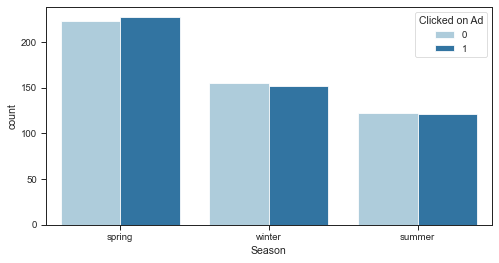

In [294]:
sns.countplot(data = df , x = 'Season' , hue = 'Clicked on Ad')

In [295]:
df.drop(['Season'] , axis = 1 , inplace = True)

<AxesSubplot:xlabel='Day_Period', ylabel='count'>

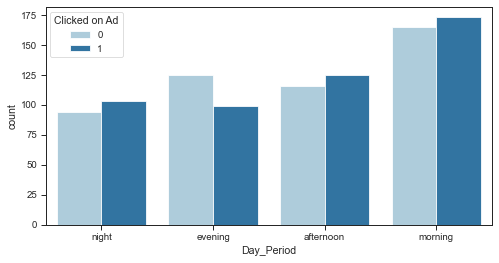

In [296]:
sns.countplot(data = df , x = 'Day_Period' , hue = 'Clicked on Ad')

In [297]:
df.drop(['Day_Period'] , axis = 1 , inplace = True)

In [298]:
df.drop(['Timestamp'] , axis = 1 , inplace = True)

In [299]:
#encdr = BinaryEncoder()

In [300]:
#df =  pd.concat([df , encdr.fit_transform(df[['Day_Period']])] , axis =1 )

In [301]:
#df.drop(['Day_Period'] , axis =1 , inplace = True)

In [302]:
df['Clicked on Ad'].value_counts(normalize = True)*100

0    50.0
1    50.0
Name: Clicked on Ad, dtype: float64

In [315]:
x = df.drop(['Clicked on Ad'] , axis = 1)
y = df['Clicked on Ad']

In [316]:
x_train , x_test , y_train , y_test = train_test_split(x, y ,
                                                       test_size = 0.15 ,stratify = y ,
                                                       shuffle = True , random_state = 7)

In [317]:
sclr = StandardScaler()

In [318]:
col_to_scl = ['Daily Time Spent on Site' , 'Age' , 'Area Income' , 'Daily Internet Usage']

In [319]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [320]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

In [321]:
model = LogisticRegression()

In [322]:
model.fit(x_train , y_train)

LogisticRegression()

In [323]:
y_train_pred = model.predict(x_train)

In [324]:
y_test_pred = model.predict(x_test)

In [325]:
accuracy_score(y_true = y_train , y_pred = y_train_pred)

0.9705882352941176

In [327]:
accuracy_score(y_true = y_test , y_pred = y_test_pred)

0.96